In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import scipy.sparse as sparse

In [2]:
nside = 64
lmax = 3*nside-1
npix = 12 * nside **2

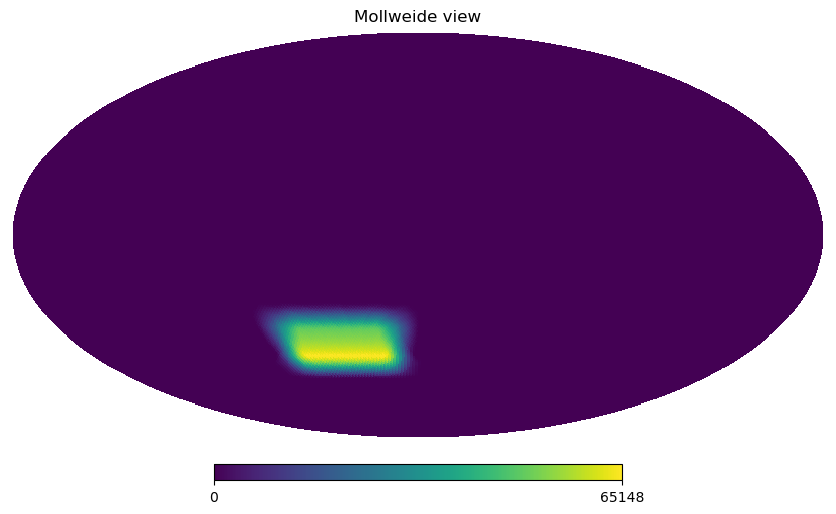

In [3]:
hp.mollview(hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_hits.fits'))

In [4]:
! python /scratch/yuyang/toast/src/toast/scripts/toast_obsmatrix_combine.py obsmat_nside64/out/0/filterbin_obs_matrix
! mv obsmat_nside64/out/0/filterbin_obs_matrix.npz obsmat_nside64/obsmat.npz

TOAST INFO: Combining observation matrix from 29 input files ...
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000034560.000000035712.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000035712.000000036864.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000036864.000000038016.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000038016.000000039168.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000039168.000000040320.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000040320.000000041472.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000041472.000000042624.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_matrix.000000042624.000000043776.000000147456.data.npy
TOAST INFO: Loading obsmat_nside64/out/0/filterbin_obs_

In [5]:
obsmat = sparse.load_npz(f'obsmat_nside{nside}/obsmat.npz')
obsmat.max()

1.3966829188558485

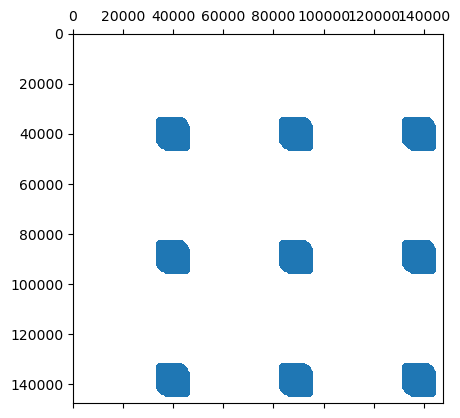

In [6]:
plt.spy(obsmat, marker='o', markersize=5)

In [7]:
m_filtered = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_filtered_map.fits', field=None)
m_unfiltered = hp.read_map(f'obsmat_nside{nside}/out/0/filterbin_unfiltered_map.fits', field=None)

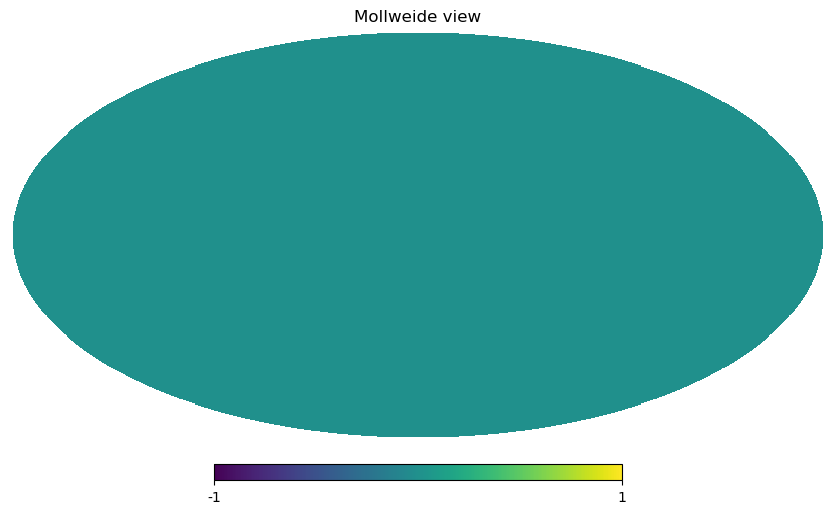

In [8]:
hp.mollview(m_filtered[0])

In [9]:
observed_map = obsmat.dot(m_unfiltered.flatten()).reshape(3, npix)

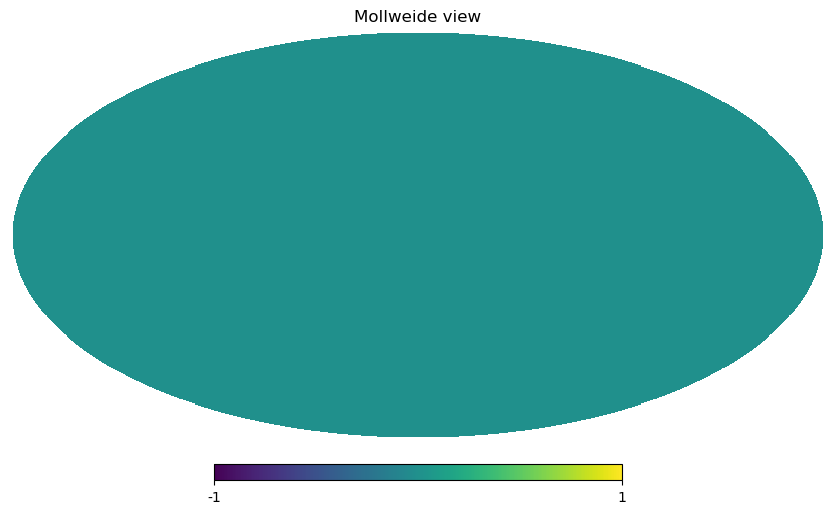

In [10]:
hp.mollview(observed_map[0])